<a href="https://colab.research.google.com/github/KIRUTHIGA-V-05/EDA_PROJECTS/blob/main/E_Commerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-Commerce Data Analysis (Brazilian Olist Dataset)**

**INTRODUCTION:**
This project performs an **Exploratory Data Analysis (EDA)** on the Brazillian E-Cmommerce public dataset by olist
(   https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv    )

The dataset contains detailed information about orders, customers, sellers, products, payments, reviews, and geolocation.

**OBJECTIVE:**

*   Understand **customer behavior** and **order patterns**
*   Analyze **delivery times, reviews, and payments**
*   Identify **popular product categories** and their performance  
*   Provide **business insights** that can help improve customer satisfaction and sales












  





In [2]:
from google.colab import files
uploaded=files.upload()

Saving olist_customers_dataset.csv to olist_customers_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv


**Data Loading**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

#loading datasets
customers=pd.read_csv("olist_customers_dataset.csv")
geolocation=pd.read_csv("olist_geolocation_dataset.csv")
items=pd.read_csv("olist_order_items_dataset.csv")
payments=pd.read_csv("olist_order_payments_dataset.csv")
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products=pd.read_csv("olist_products_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")
name=pd.read_csv("product_category_name_translation.csv")




**Overview**

We will take a first look at their structure.

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
geolocation.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
payments.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Initial Observations**

`customers`: Contains customer IDs and locations  
 `orders`: Contains timestamps for order lifecycle (purchase, approval, delivery)  
`reviews`: Customer feedback and ratings  
`payments`: Payment types and amounts  
`items` + `products`: What was ordered  
`sellers`: Information about vendors  
`geolocation`: Mapping of ZIP codes to coordinates  
`name`: Translations for product categories  

In [13]:
print(name.info())
print("___________________________________________________________________")
print(reviews.describe())
print("___________________________________________________________________")
print(sellers.isnull().sum())
print("____________________________________________________________________")
print(products.duplicated().sum())
print("____________________________________________________________________")
print("Unique orders:", orders['order_id'].nunique(), " | Rows:", len(orders))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
___________________________________________________________________
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
___________________________________________________________________
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
____________________________________________________________________
0
____________________________________________________________________
Unique orders: 99441  | Rows: 99441


**Data Cleaning**

We will handle:
1. Missing values  
2. Duplicates  
3. Outliers  
4. Ensuring consistency after merges


In [14]:
# Handle missing values in customers


customers.dropna(subset=["customer_id","customer_state"],inplace=True)
#customers["customer_state"].fillna("Unknown",inplace=True) ======================> copy(no chane in og)
customers.fillna({"customer_state": "Unknown"}, inplace=True) #=====================> (change in og)
#customers["customer_state"] = customers["customer_state"].fillna("Unknown",inplace=True) =====================> (change in og)


In [15]:
# Remove duplicate geolocations

geolocation.drop_duplicates(inplace=True)


In [16]:
# Merge datasets into a master dataframe

orders_customers = orders.merge(customers, on='customer_id', how='left')
orders_customers_pay= orders_customers.merge(payments, on='order_id', how='left')
order_items_products = items.merge(products, on='product_id', how='left')
orders_full = orders_customers_pay.merge(order_items_products, on='order_id', how='left')
orders_full = orders_full.merge(reviews, on='order_id', how='left')
orders_full = orders_full.merge(sellers, on='seller_id', how='left')
orders_full = orders_full.merge(name, on='product_category_name', how='left')


**Cleaning Summary**
- Removed missing values in customer state  
- Dropped duplicate rows in geolocation  
- Merged all datasets into a single dataframe "orders_full"

**Feature Engineering**

We will create new useful features:
- Extract **year, month, day, weekday** from purchase timestamp  
- Calculate **delivery time in days**  


In [17]:
# Convert to datetime

orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp'])
orders_full['order_approved_at'] = pd.to_datetime(orders_full['order_approved_at'])
orders_full['order_delivered_customer_date'] = pd.to_datetime(orders_full['order_delivered_customer_date'])
# Extract time features
orders_full['purchase_year'] = orders_full['order_purchase_timestamp'].dt.year
orders_full['purchase_month'] = orders_full['order_purchase_timestamp'].dt.month
orders_full['purchase_day'] = orders_full['order_purchase_timestamp'].dt.day
orders_full['purchase_weekday'] = orders_full['order_purchase_timestamp'].dt.weekday
orders_full.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,purchase_year,purchase_month,purchase_day,purchase_weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares,2017,10,2,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares,2017,10,2,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares,2017,10,2,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,belo horizonte,SP,perfumery,2018,7,24,1
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08-18 00:00:00,2018-08-22 19:07:58,14840.0,guariba,SP,auto,2018,8,8,2


In [20]:
#Calculating delivery time in days

orders_full['delivery_time_days'] = (orders_full['order_delivered_customer_date'] - orders_full['order_purchase_timestamp']).dt.days
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,purchase_year,purchase_month,purchase_day,purchase_weekday,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-12 03:43:48,9350.0,maua,SP,housewares,2017,10,2,0,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-12 03:43:48,9350.0,maua,SP,housewares,2017,10,2,0,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-12 03:43:48,9350.0,maua,SP,housewares,2017,10,2,0,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,2018-08-08 18:37:50,31570.0,belo horizonte,SP,perfumery,2018,7,24,1,13.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08-22 19:07:58,14840.0,guariba,SP,auto,2018,8,8,2,9.0


In [21]:
# Remove duplicate

orders_full = orders_full.drop_duplicates()


In [22]:
# Handle missing values

print(orders_full['product_category_name_english'].fillna('Unknown'))
orders_full['product_weight_g'].fillna(orders_full['product_weight_g'].median())


0                    housewares
1                    housewares
2                    housewares
3                     perfumery
4                          auto
                  ...          
119138                     baby
119139        home_appliances_2
119140    computers_accessories
119141    computers_accessories
119142            health_beauty
Name: product_category_name_english, Length: 119143, dtype: object


,product_weight_g
0,500.0
1,500.0
2,500.0
3,400.0
4,420.0
...,...
119138,4950.0
119139,13300.0
119140,6550.0
119141,6550.0


**Feature Engineering Summary**

- Extracted purchase date features (year, month, weekday)  
- Created new column `delivery_time_days` to measure delivery performance  


In [23]:
#detecting outlier
Q1 = orders_full['price'].quantile(0.25)
Q3 = orders_full['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
orders_full = orders_full[(orders_full['price'] >= lower) & (orders_full['price'] <= upper)]


**Exploratory Data Analysis (EDA)**

In this section, we will explore patterns and insights through visualizations:
- Distribution of Delivery Times  
- Top 10 Product Categories by Order Count
- Delivery Time vs Review Score  
- Price Distribution by Payment type
- Orders Over Time
- Review Score vs Delivery Time



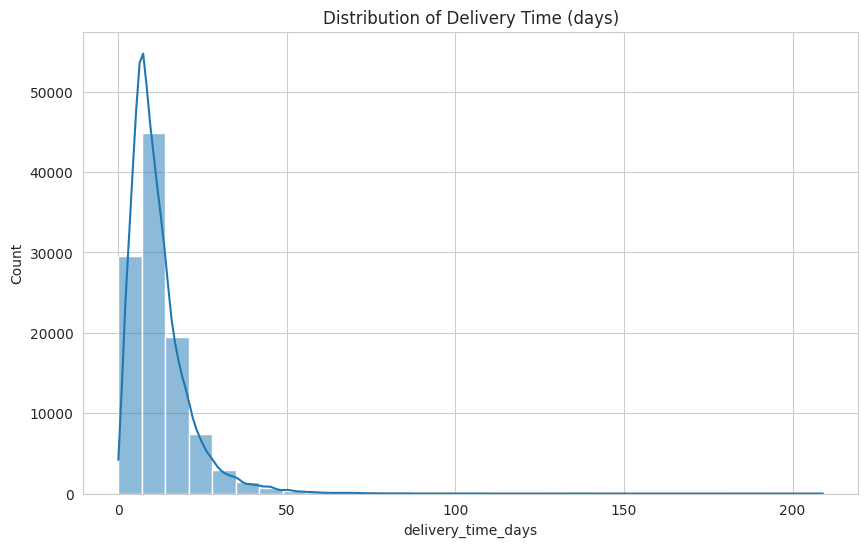

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(orders_full['delivery_time_days'].dropna(),bins=30,kde=True)
plt.title('Distribution of Delivery Time (days)')
plt.show()

**Insights:**

**Most Deliveries Are Fast**

The distribution is heavily right-skewed.

Majority of deliveries happen within 0–20 days, with the highest concentration around 5–15 days.

**Long Tail of Delays**

While most deliveries are quick, there is a long tail extending beyond 50 days, and a few extreme cases going past 150–200 days.

These are rare but significant outliers that may impact customer satisfaction.

**Peak Delivery Times**

The sharp peak around 7–10 days suggests this is the most common delivery timeframe.

Likely represents the standard delivery promise being met.

**Outliers**

Extreme cases above 100 days are visible but very few compared to the main cluster.

These could be due to logistics failures, special imports, or data quality issues.

**Key Takeaway:**

Most deliveries are completed within 2 weeks, but the presence of long delays and extreme outliers highlights a need to investigate logistics inefficiencies or data errors for cases exceeding normal delivery windows.


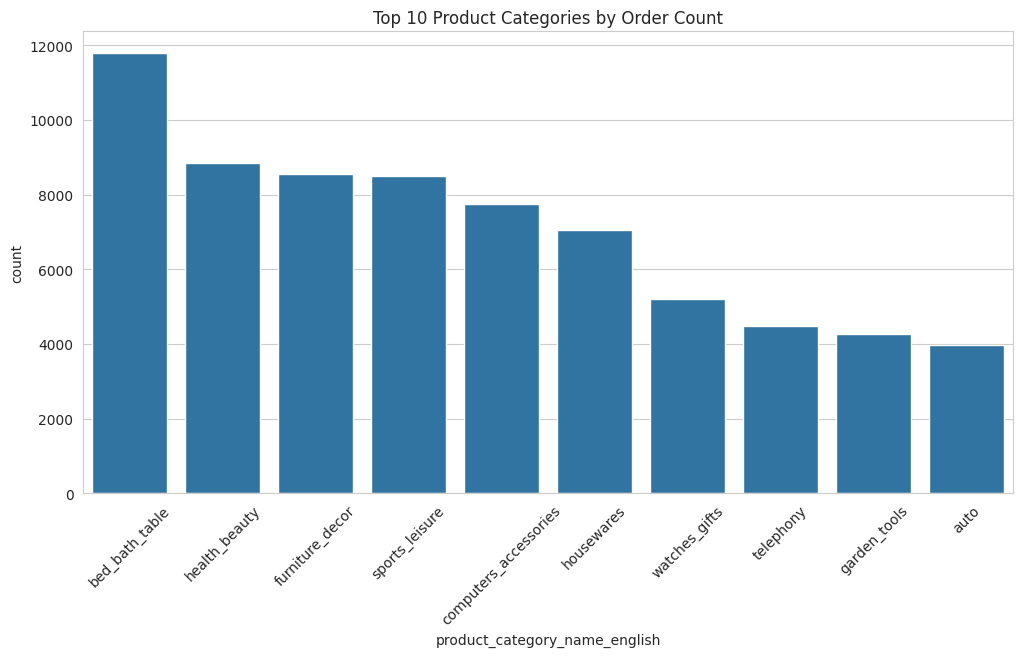

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_category_name_english',y='count',data=orders_full['product_category_name_english'].value_counts().head(10).reset_index())
plt.title('Top 10 Product Categories by Order Count')
plt.xticks(rotation=45)
plt.show()

**Insights:**

**Most Popular Category**

Bed_Bath_Table products dominate with nearly 12,000 orders, clearly ahead of other categories.

**Health & Beauty in High Demand**

With close to 9,000 orders, Health & Beauty is the second most purchased category, suggesting customers prioritize personal care and wellness items.

**Close Competition in Mid-Tier Categories**

Furniture_Decor, Sports_Leisure, and Computers_Accessories all fall in the 8,000–8,500 orders range.

This shows a fairly balanced demand across home improvement, lifestyle, and electronics.

**Moderate Demand Categories**

Housewares (≈7,000 orders) still has strong sales but lags slightly behind the top 5 categories.

Watches & Gifts (~5,000) attract a niche but significant audience.


**Lower Demand but Still in Top 10**

Telephony, Garden Tools, round out the list with 4,000–4,500 orders each.

Auto(about ~4000)

These categories show more specialized demand compared to household and lifestyle goods.

**Key Takeaway:**
Customer purchases are heavily concentrated in household essentials (bed, bath, table) and personal care (health & beauty), while lifestyle, electronics, and home improvement categories also perform strongly. Niche categories like auto and garden tools still contribute meaningfully but have lower demand compared to essentials.

<Figure size 1000x600 with 0 Axes>

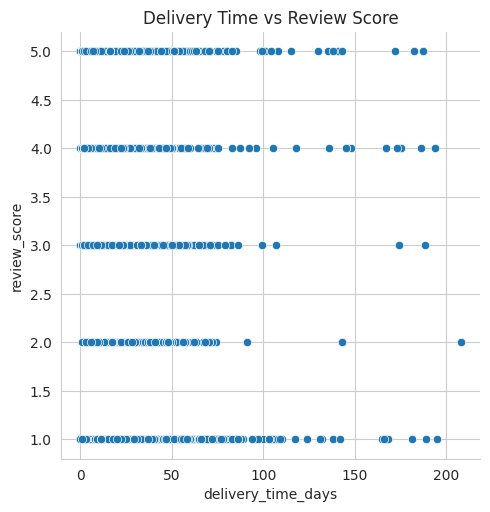

In [26]:
plt.figure(figsize=(10,6))
sns.relplot(x='delivery_time_days', y='review_score',kind='scatter',data=orders_full)
plt.title('Delivery Time vs Review Score')
plt.show()


**Insights:**

Other factors (e.g., product quality, price, packaging, communication) strongly influence reviews.

**The conclusion has been arrived fr the following observation:**

- **High Scores Despite Delays:**

     - Many customers still give 5-star reviews even when delivery times are long (50–200 days).

- **Cluster at Low Delivery Times:**

  - Most data points are concentrated around short delivery times (0–50 days).

  - Within this range, review scores vary widely from 1 to 5, showing that delivery time isn’t the sole determinant of rating.

**Negative Impact of Extreme Delays:**

Some 1-star reviews are associated with very long delivery times (150–200 days).
So while some customers tolerate delays, extreme cases clearly hurt satisfaction.

**Wide Distribution of Scores:**

At almost every delivery time, you see the full range of review scores (1 to 5).

**Potential Outliers:**

- Some orders took 150–200 days, which are extreme outliers compared to the majority.
- These rare long delays seem more correlated with low ratings, though some customers still rated high.  


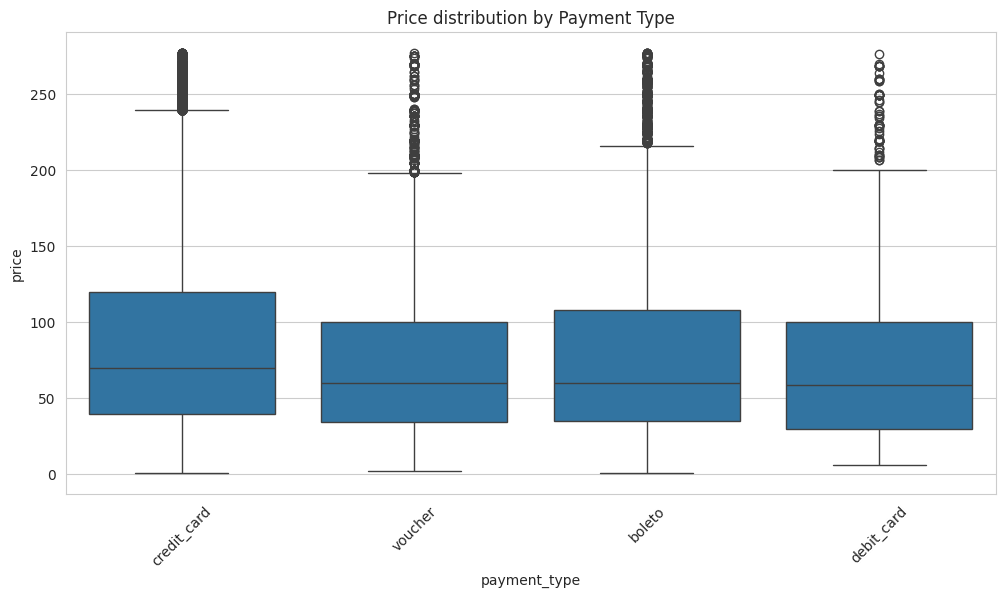

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=orders_full, x='payment_type', y='price')
plt.title('Price distribution by Payment Type')
plt.xticks(rotation=45)
plt.show()


**Insights:**


**Median Price Comparison**

The median purchase price is slightly higher for credit card and boleto compared to voucher and debit card.

This suggests customers spending with credit card/boleto tend to make slightly higher-value purchases.

**Spread of Purchases**

Credit card and boleto show a wider interquartile range (IQR), meaning purchase values are more spread out.

Voucher and debit card have a tighter IQR, suggesting purchases are more consistent/clustered around lower values.

**Outliers**

All payment types show high-value outliers (200–250+), but they are most frequent in voucher and boleto transactions.

This indicates occasional very expensive purchases regardless of payment type.

**Consistency of Purchases**

Debit card shows less variation overall (shorter box height), meaning customers using debit card usually spend in a narrower range.

Voucher shows both consistency in typical spend and a cluster of high outliers (possible special cases like gift vouchers or bulk purchases).

**General Observation**

Across all payment types, the majority of purchases are under 100, with only a small proportion crossing into high-value transactions.

**Key takeaway:**

Customers using credit cards and boletos tend to make more varied and slightly higher purchases, while debit card and voucher users usually spend less with fewer variations (though voucher transactions occasionally produce very high outliers).

    purchase_year  purchase_month  order_count year_month
0            2016               9            6     2016-9
1            2016              10          345    2016-10
2            2016              12            1    2016-12
3            2017               1          917     2017-1
4            2017               2         1906     2017-2
5            2017               3         2949     2017-3
6            2017               4         2535     2017-4
7            2017               5         4118     2017-5
8            2017               6         3537     2017-6
9            2017               7         4615     2017-7
10           2017               8         4843     2017-8
11           2017               9         4700     2017-9
12           2017              10         5170    2017-10
13           2017              11         8436    2017-11
14           2017              12         6148    2017-12
15           2018               1         8035     2018-1
16           2

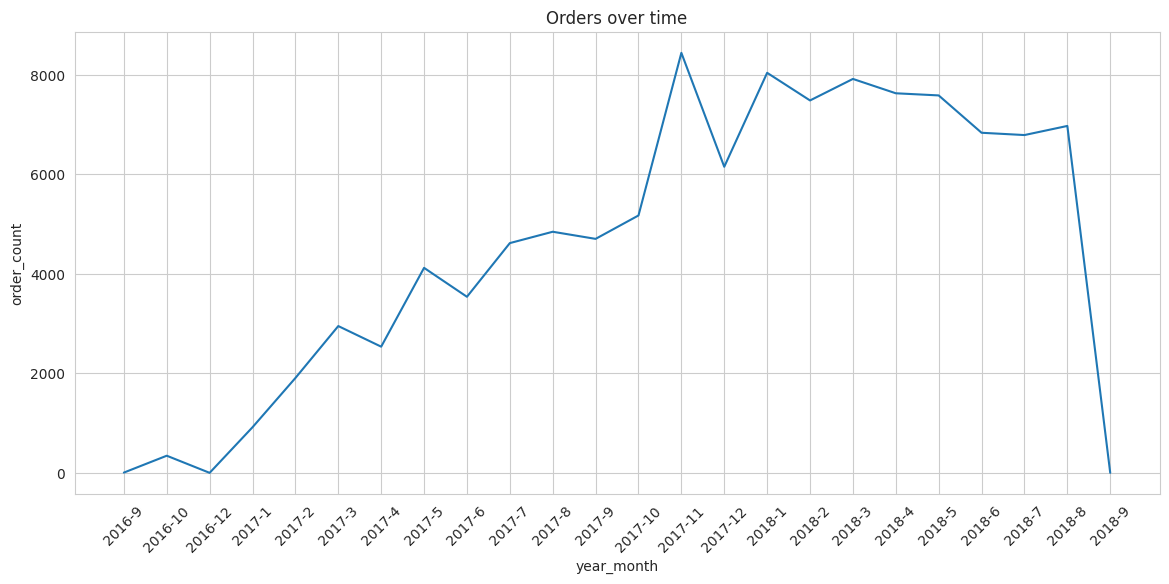

In [28]:
orders_by_month = orders_full.groupby(['purchase_year', 'purchase_month']).size().reset_index(name='order_count')
orders_by_month['year_month'] = orders_by_month['purchase_year'].astype(str) + '-' + orders_by_month['purchase_month'].astype(str)
print(orders_by_month)
plt.figure(figsize=(14,6))
sns.lineplot(data=orders_by_month, x='year_month', y='order_count')
plt.xticks(rotation=45)
plt.title('Orders over time')
plt.show()


##**Insights:**


1. **Growth Trend (2016–2017):**

   * Orders start very low in late 2016.
   * From early 2017, a clear upward trend begins.
   * The first major peak happens around mid-to-late 2017.

2. **Peak Period (Late 2017 – Early 2018):**

   * A sharp spike occurs around **Nov 2017 (2017-11)**, with orders exceeding **8,000** (highest point).
   * Despite some fluctuations, orders remain consistently high (7,000–8,000 range) through **most of 2018 (till mid-year)**.

3. **Stability (2018 first half):**

   * Orders plateau around 7,500–8,000, suggesting a period of sustained demand.

4. **Decline (Mid-to-Late 2018):**

   * Around mid-2018, orders start to **gradually decline**.
   * In **Sept 2018 (2018-9)**, there is a **sudden drop to almost zero**


##**Key Takeaways:**

* **Rapid Growth:** Orders grew quickly from late 2016 to late 2017, showing strong adoption or market expansion.
* **Sustained High Demand:** Orders stabilized at a high level for about a year (late 2017–mid 2018).
* **Decline Signals:** The gradual decrease in mid-2018 could suggest **market saturation, reduced promotions, or increased competition**.
* **Data Issue in Sept 2018:** The sharp fall to zero seems more like **incomplete or missing data** rather than a real business decline.



                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
5  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
6  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
7  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
8  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
9  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    de

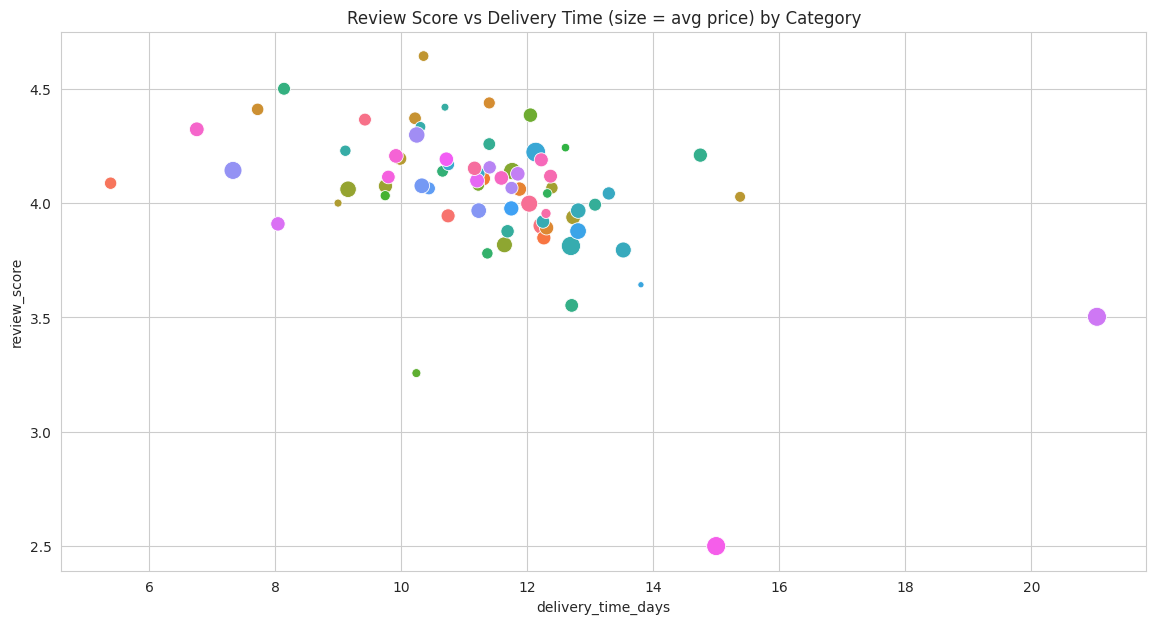

In [29]:

print(orders_full.head(10))
cat_stats = orders_full.groupby('product_category_name_english').agg({
  'delivery_time_days': 'mean',
  'review_score': 'mean',
  'price': 'mean'
}).reset_index()
print("____________________________________________________________________________________________________________________________________________________")
print(cat_stats)
plt.figure(figsize=(14,7))
sns.scatterplot(data=cat_stats, x='delivery_time_days', y='review_score', size='price', hue='product_category_name_english', legend=False, sizes=(20,200))
plt.title('Review Score vs Delivery Time (size = avg price) by Category')
plt.show()


##**Observations:**

**Delivery Time (x-axis):**

Most categories cluster around 8–13 days delivery time.

Few outliers exist at >15 days, where review scores drop significantly.

**Review Score (y-axis):**

Most review scores are between 3.8 and 4.5, showing customers are generally satisfied.

Categories with very long delivery times (>15 days) tend to have lower review scores (2.5–3.5).

**Category Spread (colors):**

Different categories (colors) overlap in the same delivery time range, suggesting delivery time influences satisfaction more than category type.

No one category consistently dominates with very high or very low review scores.

**Bubble Size (avg price):**

Larger bubbles (higher-priced categories) are scattered across the plot.

Interestingly, high-priced categories don’t guarantee higher review scores—some expensive ones have poor ratings when delivery is slow.

Categories with reasonable delivery time (~10–12 days) and high avg price often still maintain review scores >4.

##**Key Takeaways:**

- Delivery Time is a major driver of customer satisfaction. Review scores drop sharply when delivery exceeds ~15 days.

- Sweet Spot: Most categories achieve good review scores (≥4.0) when delivery times stay within 8–12 days.

- Price alone doesn’t ensure satisfaction. Even high-priced products can get poor reviews if delivery is delayed.

- Business Focus: To maximize review scores, reducing delivery times to ≤12 days should be a key logistics priority.

- Category impact is secondary. Customer experience depends more on delivery time than product category.